## Yolo8  Training 

In [1]:
!nvidia-smi

Sun Mar 30 21:03:39 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 536.23                 Driver Version: 536.23       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3070      WDDM  | 00000000:01:00.0  On |                  N/A |
|  0%   47C    P8              18W / 240W |   1432MiB /  8192MiB |      3%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Import all the package that we need

In [3]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()


## Set up Parameters for training

In [ ]:
#from ultralytics import YOLO
model = YOLO("yolov8n.pt")  # nano model
model.train(
    data=" d:/STUDY_UNSW/2025T1/COMP9444_DL_Neural_Network/Team_project/Project/Dataset/data.yaml",  
    epochs=10,
    imgsz=640,
    batch=16,         
    workers=2        
)

#### This code is designed to batch evaluate the detection performance of the YOLOv8 model on multiple test sets. By cyclically processing each test set and recording its mAP50 (representing the coarse-grained detection effect) and MAP50-95

In [ ]:
from ultralytics import YOLO
import os
import pandas as pd

# Load the model
model = YOLO("runs/detect/train9/weights/best.pt")

# The paths to the test datasets
yaml_paths = [os.path.abspath(f"Dataset/test_{i}.yaml") for i in range(4)]

# store the results
results = []

# test each dataset
for i, yaml_path in enumerate(yaml_paths):
    print(f"Testing：test_{i} ...")
    metrics = model.val(data=yaml_path, split='test', verbose=False)
    results.append({
        "Test Set": f"test_{i}",
        "mAP50": metrics.box.map50,
        "mAP50-95": metrics.box.map
    })

# print the results
df = pd.DataFrame(results)
print(df)


🔍 正在验证：test_0 ...
Ultralytics 8.3.98  Python-3.11.2 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3070, 8192MiB)
Model summary (fused): 72 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning D:\STUDY_UNSW\2025T1\COMP9444_DL_Neural_Network\Team_project\Project\Dataset\labels\test_0.cache... 1776 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1776/1776 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [00:07<00:00, 14.11it/s]


                   all       1776       1780      0.867      0.834      0.875      0.417
Speed: 0.2ms preprocess, 1.7ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs\detect\val
🔍 正在验证：test_1 ...
Ultralytics 8.3.98  Python-3.11.2 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3070, 8192MiB)


val: Scanning D:\STUDY_UNSW\2025T1\COMP9444_DL_Neural_Network\Team_project\Project\Dataset\labels\test_1... 922 images, 0 backgrounds, 0 corrupt: 100%|██████████| 922/922 [00:01<00:00, 690.34it/s]


val: New cache created: D:\STUDY_UNSW\2025T1\COMP9444_DL_Neural_Network\Team_project\Project\Dataset\labels\test_1.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:06<00:00,  9.21it/s]


                   all        922        923      0.867      0.858      0.885      0.434
Speed: 0.2ms preprocess, 2.6ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs\detect\val2
🔍 正在验证：test_2 ...
Ultralytics 8.3.98  Python-3.11.2 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3070, 8192MiB)


val: Scanning D:\STUDY_UNSW\2025T1\COMP9444_DL_Neural_Network\Team_project\Project\Dataset\labels\test_2... 548 images, 0 backgrounds, 0 corrupt: 100%|██████████| 548/548 [00:01<00:00, 409.31it/s]


val: New cache created: D:\STUDY_UNSW\2025T1\COMP9444_DL_Neural_Network\Team_project\Project\Dataset\labels\test_2.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:05<00:00,  6.47it/s]


                   all        548        550      0.852      0.828      0.869      0.413
Speed: 0.4ms preprocess, 2.0ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs\detect\val3
🔍 正在验证：test_3 ...
Ultralytics 8.3.98  Python-3.11.2 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3070, 8192MiB)


val: Scanning D:\STUDY_UNSW\2025T1\COMP9444_DL_Neural_Network\Team_project\Project\Dataset\labels\test_3... 306 images, 0 backgrounds, 0 corrupt: 100%|██████████| 306/306 [00:00<00:00, 648.99it/s]


val: New cache created: D:\STUDY_UNSW\2025T1\COMP9444_DL_Neural_Network\Team_project\Project\Dataset\labels\test_3.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 11.74it/s]


                   all        306        307      0.853      0.789      0.835      0.388
Speed: 0.3ms preprocess, 1.9ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs\detect\val4
  Test Set     mAP50  mAP50-95
0   test_0  0.874707  0.417339
1   test_1  0.885331  0.434027
2   test_2  0.868996  0.413138
3   test_3  0.834814  0.388013


In [2]:
from ultralytics import YOLO
model = YOLO("runs/detect/train9/weights/best.pt")

#### To prevent creating so many files in images and labels, I try to test the model on my own method instead of the embedded function in YOLO.


#### After scaling the image, this function conducts detection using the YOLO model and manually calculates evaluation indicators such as accuracy, recall rate, F1 and mAP50.

In [2]:
import os
from PIL import Image
import numpy as np
from ultralytics import YOLO
from collections import defaultdict

def resize_and_evaluate_yolo(model, image_dir, label_dir, resize_ratio=0.5, iou_threshold=0.5, conf_threshold=0.25):
    """
    Predict with resized images and manually evaluate Accuracy, Precision, Recall, F1, mAP50
    """
    image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]
    TP, FP, FN = 0, 0, 0

    # For mAP50 calculation
    class_scores = defaultdict(list)  # {cls: [(conf, is_tp)]}

    for fname in image_files:
        img_path = os.path.join(image_dir, fname)
        label_path = os.path.join(label_dir, fname.replace('.jpg', '.txt'))

        if not os.path.exists(label_path):
            continue

        # Load and resize image
        img = Image.open(img_path).convert("RGB")
        w, h = img.size
        resized_img = img.resize((int(w * resize_ratio), int(h * resize_ratio)))

        # Run YOLO prediction
        results = model.predict(source=resized_img, conf=conf_threshold, iou=iou_threshold, verbose=False)
        preds = results[0].boxes

        # Load ground truth labels
        with open(label_path, 'r') as f:
            lines = f.readlines()

        gt_boxes = []
        for line in lines:
            cls, cx, cy, bw, bh = map(float, line.strip().split())
            x1 = (cx - bw / 2) * resized_img.width
            y1 = (cy - bh / 2) * resized_img.height
            x2 = (cx + bw / 2) * resized_img.width
            y2 = (cy + bh / 2) * resized_img.height
            gt_boxes.append([x1, y1, x2, y2, int(cls)])

        matched_gt = set()

        # Evaluate predictions
        for i, pred_box in enumerate(preds.xyxy):
            px1, py1, px2, py2 = pred_box[:4].tolist()
            pcls = int(preds.cls[i])
            conf = float(preds.conf[i])
            best_iou = 0
            best_gt_idx = -1

            for j, (gx1, gy1, gx2, gy2, gcls) in enumerate(gt_boxes):
                if j in matched_gt or gcls != pcls:
                    continue
                # Compute IoU
                ix1 = max(px1, gx1)
                iy1 = max(py1, gy1)
                ix2 = min(px2, gx2)
                iy2 = min(py2, gy2)
                iw = max(0, ix2 - ix1)
                ih = max(0, iy2 - iy1)
                inter = iw * ih
                union = (px2 - px1) * (py2 - py1) + (gx2 - gx1) * (gy2 - gy1) - inter
                iou = inter / union if union > 0 else 0

                if iou >= iou_threshold and iou > best_iou:
                    best_iou = iou
                    best_gt_idx = j

            if best_gt_idx >= 0:
                TP += 1
                matched_gt.add(best_gt_idx)
                class_scores[pcls].append((conf, 1))  # TP
            else:
                FP += 1
                class_scores[pcls].append((conf, 0))  # FP

        FN += len(gt_boxes) - len(matched_gt)

    # Final metrics
    precision = TP / (TP + FP) if TP + FP > 0 else 0
    recall = TP / (TP + FN) if TP + FN > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if precision + recall > 0 else 0
    acc = TP / (TP + FP + FN) if TP + FP + FN > 0 else 0

    # Compute mAP50
    def compute_ap(class_result):
        if not class_result:
            return 0
        class_result.sort(reverse=True, key=lambda x: x[0])  # sort by confidence desc
        tp_cum = 0
        fp_cum = 0
        precisions = []
        recalls = []
        total_gt = sum(1 for _, v in class_result if v == 1)

        for conf, is_tp in class_result:
            if is_tp:
                tp_cum += 1
            else:
                fp_cum += 1
            precision = tp_cum / (tp_cum + fp_cum)
            recall = tp_cum / total_gt if total_gt > 0 else 0
            precisions.append(precision)
            recalls.append(recall)

        ap = 0
        for r_thresh in np.linspace(0, 1, 11):
            p = max([p for p, r in zip(precisions, recalls) if r >= r_thresh], default=0)
            ap += p
        ap /= 11
        return ap

    aps = []
    for cls, results in class_scores.items():
        ap = compute_ap(results)
        aps.append(ap)
    map50 = sum(aps) / len(aps) if aps else 0

    return {
        "TP": TP,
        "FP": FP,
        "FN": FN,
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1": f1,
        "mAP50": map50
    }


#### This code evaluates the detection performance of the YOLO model on four test sets respectively at two scaling ratios (0.5 and 0.3), and summarizes Accuracy, Precision, Recall, F1, and mAP50 into a table for output.

In [ ]:
import pandas as pd
import os

test_sets = [f"test_{i}" for i in range(4)]
resize_ratios = [0.5, 0.3]

image_base = "Dataset/images"
label_base = "Dataset/labels"

results_list = []

for ratio in resize_ratios:
    for test_set in test_sets:
        image_dir = os.path.join(image_base, test_set)
        label_dir = os.path.join(label_base, test_set)

        results = resize_and_evaluate_yolo(model, image_dir, label_dir, resize_ratio=ratio)

        results_list.append({
            "Resize Ratio": ratio,
            "Test Set": test_set,
            "Accuracy": round(results["Accuracy"], 4),
            "Precision": round(results["Precision"], 4),
            "Recall": round(results["Recall"], 4),
            "F1 Score": round(results["F1"], 4),
            "mAP50": round(results["mAP50"], 4)
        })
    
    # Container for the final result
    results_list.append({
        "Resize Ratio": "",
        "Test Set": "",
        "Accuracy": "",
        "Precision": "",
        "Recall": "",
        "F1 Score": "",
        "mAP50": ""
    })

# Print the result
df = pd.DataFrame(results_list)
print(df.to_string(index=False))


Resize Ratio Test Set Accuracy Precision  Recall F1 Score   mAP50
         0.5   test_0   0.7612    0.8676  0.8612   0.8644  0.9534
         0.5   test_1   0.7795    0.8714  0.8808   0.8761  0.9586
         0.5   test_2   0.7613    0.8708  0.8582   0.8645  0.9423
         0.5   test_3   0.7066    0.8493  0.8078    0.828  0.9619
                                                                 
         0.3   test_0   0.7098    0.8418  0.8191   0.8303  0.9437
         0.3   test_1   0.7403    0.8554  0.8462   0.8508  0.9504
         0.3   test_2   0.6987    0.8406  0.8055   0.8227  0.9409
         0.3   test_3   0.6411    0.8014  0.7622   0.7813  0.9524
                                                                 


#### The function rotate_and_evaluate_yolo rotates the image (by default 15°) and uses the YOLO model for detection. Subsequently, manually calculate and return evaluation metrics such as Accuracy, Precision, Recall, F1 score and mAP50 to assess the robustness of the model against rotational perturbations

In [5]:
import os
from PIL import Image
import numpy as np
from ultralytics import YOLO
from collections import defaultdict

def rotate_bbox(bbox, angle, image_size):
    """
    bbox: [x1, y1, x2, y2]
    angle: degrees (positive = counter-clockwise)
    image_size: (width, height)
    return: rotated [x1', y1', x2', y2']
    """
    w, h = image_size
    angle_rad = -np.deg2rad(angle)  # PIL is CCW, this is CW

    cx, cy = w / 2, h / 2

    # Get four corners
    x1, y1, x2, y2 = bbox
    corners = np.array([
        [x1, y1],
        [x1, y2],
        [x2, y1],
        [x2, y2]
    ])

    # Move to origin
    corners -= np.array([cx, cy])

    # Rotate
    rotation_matrix = np.array([
        [np.cos(angle_rad), -np.sin(angle_rad)],
        [np.sin(angle_rad),  np.cos(angle_rad)]
    ])
    rotated = corners @ rotation_matrix.T

    # Move back
    rotated += np.array([cx, cy])
    x_coords, y_coords = rotated[:, 0], rotated[:, 1]

    return [x_coords.min(), y_coords.min(), x_coords.max(), y_coords.max()]

def rotate_and_evaluate_yolo(model, image_dir, label_dir, angle=15, iou_threshold=0.5, conf_threshold=0.25):
    image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]
    TP, FP, FN = 0, 0, 0
    class_scores = defaultdict(list)

    for fname in image_files:
        img_path = os.path.join(image_dir, fname)
        label_path = os.path.join(label_dir, fname.replace('.jpg', '.txt'))

        if not os.path.exists(label_path):
            continue

        # Load and rotate image
        img = Image.open(img_path).convert("RGB")
        rotated_img = img.rotate(angle, expand=False)
        w, h = rotated_img.size

        # Predict
        results = model.predict(source=rotated_img, conf=conf_threshold, iou=iou_threshold, verbose=False)
        preds = results[0].boxes

        # Load and rotate GT bboxes
        with open(label_path, 'r') as f:
            lines = f.readlines()

        gt_boxes = []
        for line in lines:
            cls, cx, cy, bw, bh = map(float, line.strip().split())
            # Convert YOLO to absolute
            x1 = (cx - bw / 2) * w
            y1 = (cy - bh / 2) * h
            x2 = (cx + bw / 2) * w
            y2 = (cy + bh / 2) * h
            rotated_box = rotate_bbox([x1, y1, x2, y2], angle, (w, h))
            gt_boxes.append([*rotated_box, int(cls)])

        matched_gt = set()

        for i, pred_box in enumerate(preds.xyxy):
            px1, py1, px2, py2 = pred_box[:4].tolist()
            pcls = int(preds.cls[i])
            conf = float(preds.conf[i])
            best_iou = 0
            best_gt_idx = -1

            for j, (gx1, gy1, gx2, gy2, gcls) in enumerate(gt_boxes):
                if j in matched_gt or gcls != pcls:
                    continue
                # Compute IoU
                ix1 = max(px1, gx1)
                iy1 = max(py1, gy1)
                ix2 = min(px2, gx2)
                iy2 = min(py2, gy2)
                iw = max(0, ix2 - ix1)
                ih = max(0, iy2 - iy1)
                inter = iw * ih
                union = (px2 - px1) * (py2 - py1) + (gx2 - gx1) * (gy2 - gy1) - inter
                iou = inter / union if union > 0 else 0

                if iou >= iou_threshold and iou > best_iou:
                    best_iou = iou
                    best_gt_idx = j

            if best_gt_idx >= 0:
                TP += 1
                matched_gt.add(best_gt_idx)
                class_scores[pcls].append((conf, 1))  # TP
            else:
                FP += 1
                class_scores[pcls].append((conf, 0))  # FP

        FN += len(gt_boxes) - len(matched_gt)

    # Metrics
    precision = TP / (TP + FP) if TP + FP > 0 else 0
    recall = TP / (TP + FN) if TP + FN > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if precision + recall > 0 else 0
    acc = TP / (TP + FP + FN) if TP + FP + FN > 0 else 0

    # Compute mAP50
    def compute_ap(class_result):
        if not class_result:
            return 0
        class_result.sort(reverse=True, key=lambda x: x[0])
        tp_cum = 0
        fp_cum = 0
        precisions = []
        recalls = []
        total_gt = sum(1 for _, v in class_result if v == 1)

        for conf, is_tp in class_result:
            if is_tp:
                tp_cum += 1
            else:
                fp_cum += 1
            precision = tp_cum / (tp_cum + fp_cum)
            recall = tp_cum / total_gt if total_gt > 0 else 0
            precisions.append(precision)
            recalls.append(recall)

        ap = 0
        for r_thresh in np.linspace(0, 1, 11):
            p = max([p for p, r in zip(precisions, recalls) if r >= r_thresh], default=0)
            ap += p
        return ap / 11

    aps = [compute_ap(v) for v in class_scores.values()]
    map50 = sum(aps) / len(aps) if aps else 0

    return {
        "TP": TP,
        "FP": FP,
        "FN": FN,
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1": f1,
        "mAP50": map50
    }


#### This code rotates the images in the four test sets by 15°, then uses the YOLO model for detection, and summarizes the Accuracy, Precision, Recall, F1 and mAP50 of each test set to evaluate the robustness performance of the model under rotation perturbation.

In [ ]:
import os
import pandas as pd


test_sets = [f"test_{i}" for i in range(4)]
image_base = "Dataset/images"
label_base = "Dataset/labels"

# store the result
rotated_results = []

for test_set in test_sets:
    image_dir = os.path.join(image_base, test_set)
    label_dir = os.path.join(label_base, test_set)

    result = rotate_and_evaluate_yolo(
        model=model,
        image_dir=image_dir,
        label_dir=label_dir,
        angle=15  # rotate 15 degrees
    )

    rotated_results.append({
        "Test Set": test_set,
        "Rotation": "15°",
        "Accuracy": round(result["Accuracy"], 4),
        "Precision": round(result["Precision"], 4),
        "Recall": round(result["Recall"], 4),
        "F1": round(result["F1"], 4),
        "mAP50": round(result["mAP50"], 4)
    })

# print the result
df_rotated = pd.DataFrame(rotated_results)
print("Rotation = 15°")
print(df_rotated.to_string(index=False))


Rotation = 15°
Test Set Rotation  Accuracy  Precision  Recall     F1  mAP50
  test_0      15°    0.1753     0.2389  0.3972 0.2983 0.7571
  test_1      15°    0.1716     0.2362  0.3857 0.2930 0.7716
  test_2      15°    0.1742     0.2358  0.4000 0.2967 0.7774
  test_3      15°    0.1882     0.2519  0.4267 0.3168 0.7396


#### This code uses the YOLO model to detect four test sets without performing image rotation (0°), manually calculates Accuracy, Precision, Recall, F1 and mAP50, and outputs the detection performance results in the original state as the benchmark reference.

In [7]:
import os
import pandas as pd
# store the original results
original_results = []

test_sets = [f"test_{i}" for i in range(4)]
image_base = "Dataset/images"
label_base = "Dataset/labels"

for test_set in test_sets:
    image_dir = os.path.join(image_base, test_set)
    label_dir = os.path.join(label_base, test_set)

    result = rotate_and_evaluate_yolo(
        model=model,
        image_dir=image_dir,
        label_dir=label_dir,
        angle=0  # no rotation (0°)
    )

    original_results.append({
        "Test Set": test_set,
        "Accuracy": round(result["Accuracy"], 4),
        "Precision": round(result["Precision"], 4),
        "Recall": round(result["Recall"], 4),
        "F1": round(result["F1"], 4),
        "mAP50": round(result["mAP50"], 4)
    })

# print the original results
df_original = pd.DataFrame(original_results)
print(df_original.to_string(index=False))


Test Set  Accuracy  Precision  Recall     F1  mAP50
  test_0    0.7693     0.8624  0.8770 0.8696 0.9498
  test_1    0.7907     0.8665  0.9003 0.8831 0.9543
  test_2    0.7568     0.8577  0.8655 0.8615 0.9362
  test_3    0.7278     0.8581  0.8274 0.8425 0.9621


## The final result for YOLO8 Model

#### We print out the final performance of the model on the 4 different test datasets.And the performance on each label on the dataset contains the whole

In [6]:
from ultralytics import YOLO
import pandas as pd

# Load the model
model = YOLO("runs/detect/train9/weights/best.pt")

#Test on the whole test dataset
metrics = model.val(data="Dataset/test_0.yaml", split="test", save_json=True)

# Get the points
p = metrics.box.p
r = metrics.box.r
f1 = metrics.box.f1
ap50 = metrics.box.ap50

# Name for the classes
class_names = model.names

# Create a DataFrame for the results
df = pd.DataFrame({
    "Class Index": list(class_names.keys()),
    "Class Name": list(class_names.values()),
    "Precision": p,
    "Recall": r,
    "F1": f1,
    "mAP50": ap50
})

# Print the DataFrame
print(df)

# Save the DataFrame to a CSV file
df.to_csv("Dataset/test_0_results.csv", index=False)

Ultralytics 8.3.98  Python-3.11.2 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3070, 8192MiB)
Model summary (fused): 72 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning D:\STUDY_UNSW\2025T1\COMP9444_DL_Neural_Network\Team_project\Project\Dataset\labels\test_0.cache... 1776 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1776/1776 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [00:08<00:00, 12.73it/s]


                   all       1776       1780      0.867      0.834      0.875      0.417
        Straight_Knife        235        235        0.8       0.58      0.709      0.279
         Folding_Knife        403        404      0.846      0.886      0.915      0.426
               Scissor        368        368      0.989       0.98      0.989      0.538
         Utility_Knife        343        343      0.819       0.81      0.826      0.412
      Multi-tool_Knife        429        430      0.879      0.914      0.934      0.433
Speed: 0.2ms preprocess, 1.8ms inference, 0.0ms loss, 0.5ms postprocess per image
Saving runs\detect\val28\predictions.json...
Results saved to runs\detect\val28
   Class Index        Class Name  Precision    Recall        F1     mAP50
0            0    Straight_Knife   0.800402  0.580185  0.672730  0.709352
1            1     Folding_Knife   0.845588  0.886139  0.865388  0.914923
2            2           Scissor   0.989036  0.980499  0.984749  0.989107
3       

## Print out the performance of the model on different datasets.

In [7]:
from ultralytics import YOLO
import pandas as pd
import os
import numpy as np


# The setup for the test datasets
test_sets = [f"test_{i}" for i in range(4)]
yaml_paths = [os.path.abspath(f"Dataset/{t}.yaml") for t in test_sets]
image_dirs = [f"Dataset/images/{t}" for t in test_sets]
label_dirs = [f"Dataset/labels/{t}" for t in test_sets]

results = []

for name, yaml_path, image_dir, label_dir in zip(test_sets, yaml_paths, image_dirs, label_dirs):
    print(f"Evaluating {name}...")

    # Get metrics from the model
    metrics = model.val(data=yaml_path, split="test", verbose=False)
    precision = sum(metrics.box.p) / len(metrics.box.p)
    recall = sum(metrics.box.r) / len(metrics.box.r)
    f1 = sum(metrics.box.f1) / len(metrics.box.f1)
    map50 = sum(metrics.box.ap50) / len(metrics.box.ap50)

    # Use the model to predict on the test set
    predictions = model.predict(source=image_dir, conf=0.001, iou=0.001, verbose=False)
    
    from pathlib import Path
    iou_hits = 0
    iou_total = 0
    valid_iou_count = 0
    total_images = 0

    for pred in predictions:
        image_name = Path(pred.path).name.replace(".jpg", ".txt")
        label_path = os.path.join(label_dir, image_name)
        if not os.path.exists(label_path):
            continue

        total_images += 1

        # Load GT boxes
        h, w = pred.orig_shape
        with open(label_path, "r") as f:
            gts = []
            for line in f.readlines():
                cls, cx, cy, bw, bh = map(float, line.strip().split())
                x1 = (cx - bw/2) * w
                y1 = (cy - bh/2) * h
                x2 = (cx + bw/2) * w
                y2 = (cy + bh/2) * h
                gts.append([x1, y1, x2, y2])
        if not gts or pred.boxes is None:
            continue

        # Predict boxes
        gts = np.array(gts)
        preds = pred.boxes.xyxy.cpu().numpy()

        max_iou = 0
        for p in preds:
            for g in gts:
                ix1 = max(p[0], g[0])
                iy1 = max(p[1], g[1])
                ix2 = min(p[2], g[2])
                iy2 = min(p[3], g[3])
                inter = max(0, ix2 - ix1) * max(0, iy2 - iy1)
                union = (p[2]-p[0])*(p[3]-p[1]) + (g[2]-g[0])*(g[3]-g[1]) - inter
                iou = inter / union if union > 0 else 0
                max_iou = max(max_iou, iou)

        if max_iou > 0.5:
            iou_hits += 1
        iou_total += max_iou
        valid_iou_count += 1

    iou_ratio = iou_hits / total_images if total_images > 0 else 0
    iou_mean = iou_total / valid_iou_count if valid_iou_count > 0 else 0

    # Summarize results
    results.append({
        "Test Set": name,
        "Precision": round(precision, 4),
        "Recall": round(recall, 4),
        "F1": round(f1, 4),
        "mAP50": round(map50, 4),
        "IoU Ratio": round(iou_ratio, 4),
        "Avg IoU": round(iou_mean, 4)
    })

df = pd.DataFrame(results)
print(df)

# Save the DataFrame to a CSV file
df.to_csv("Dataset/test_results.csv", index=False)


Evaluating test_0...
Ultralytics 8.3.98  Python-3.11.2 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3070, 8192MiB)


val: Scanning D:\STUDY_UNSW\2025T1\COMP9444_DL_Neural_Network\Team_project\Project\Dataset\labels\test_0.cache... 1776 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1776/1776 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [00:08<00:00, 12.44it/s]


                   all       1776       1780      0.867      0.834      0.875      0.417
Speed: 0.2ms preprocess, 2.0ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs\detect\val29

WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

Evaluating test_1...
Ultralytics 8.3.98  Python-3.11.2 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3070, 8192MiB)


val: Scanning D:\STUDY_UNSW\2025T1\COMP9444_DL_Neural_Network\Team_project\Project\Dataset\labels\test_1.cache... 922 images, 0 backgrounds, 0 corrupt: 100%|██████████| 922/922 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:15<00:00,  3.86it/s]


                   all        922        923      0.867      0.858      0.885      0.434
Speed: 0.4ms preprocess, 3.2ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs\detect\val30
Evaluating test_2...
Ultralytics 8.3.98  Python-3.11.2 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3070, 8192MiB)


val: Scanning D:\STUDY_UNSW\2025T1\COMP9444_DL_Neural_Network\Team_project\Project\Dataset\labels\test_2.cache... 548 images, 0 backgrounds, 0 corrupt: 100%|██████████| 548/548 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:03<00:00, 11.56it/s]


                   all        548        550      0.852      0.828      0.869      0.413
Speed: 0.3ms preprocess, 1.9ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs\detect\val31
Evaluating test_3...
Ultralytics 8.3.98  Python-3.11.2 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3070, 8192MiB)


val: Scanning D:\STUDY_UNSW\2025T1\COMP9444_DL_Neural_Network\Team_project\Project\Dataset\labels\test_3.cache... 306 images, 0 backgrounds, 0 corrupt: 100%|██████████| 306/306 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 12.02it/s]


                   all        306        307      0.853      0.789      0.835      0.388
Speed: 0.6ms preprocess, 1.7ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs\detect\val32
  Test Set  Precision  Recall      F1   mAP50  IoU Ratio  Avg IoU
0   test_0     0.8666  0.8343  0.8468  0.8747     0.9347   0.7168
1   test_1     0.8671  0.8577  0.8615  0.8853     0.9371   0.7206
2   test_2     0.8525  0.8284  0.8362  0.8690     0.9325   0.7228
3   test_3     0.8525  0.7894  0.8112  0.8348     0.9314   0.6946


## Test the model and print out the result photo


image 1/1 d:\STUDY_UNSW\2025T1\COMP9444_DL_Neural_Network\Team_project\Project\Dataset\images\test_0\024119.jpg: 512x640 1 Scissor, 38.1ms
Speed: 4.0ms preprocess, 38.1ms inference, 2.1ms postprocess per image at shape (1, 3, 512, 640)
Results saved to runs\detect\predict3


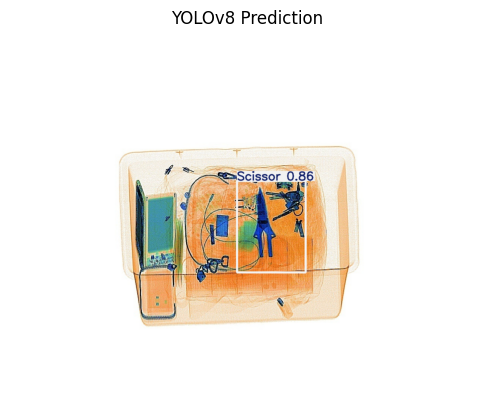

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
# Set the path to the model
model = YOLO("runs/detect/train9/weights/best.pt")

image_path = "Dataset/images/test_0/024119.jpg"
# predict using the model
results = model.predict(source=image_path, save=True, conf=0.25)

# Show the results
img = cv2.cvtColor(results[0].plot(), cv2.COLOR_BGR2RGB)

# Plot the image with predictions
plt.imshow(img)
plt.axis('off')
plt.title("YOLOv8 Prediction")
plt.show()

#### This code uses the YOLO model to reason about all the images in the test_0 test set, and for the target categories "Scissor" and "Straight_Knife", it identifies the images with the highest (best) and lowest (worst) confidence in each category. It is used to analyze the strongest and weakest performance samples of the model for detecting specific categories.

In [ ]:
from ultralytics import YOLO
from pathlib import Path
import numpy as np

# Load the model
image_dir = Path("Dataset/images/test_0")
image_paths = list(image_dir.glob("*.jpg"))

# Class name and mapping
class_map = {
    'Straight_Knife': 0,
    'Folding_Knife': 1,
    'Scissor': 2,
    'Utility_Knife': 3,
    'Multi-tool_Knife': 4
}

target_classes = ["Scissor", "Straight_Knife"]

# Record the best and worst images for each class
class_results = {
    cls_name: {
        "best": ("", -1.0),   # (path, best_conf)
        "worst": ("", 1.1)    # (path, worst_conf)
    } for cls_name in target_classes
}

for img_path in image_paths:
    results = model.predict(source=str(img_path), conf=0.25, iou=0.5, verbose=False)
    r = results[0]
    if r.boxes is None or len(r.boxes) == 0:
        continue

    classes = r.boxes.cls.cpu().numpy()
    confs = r.boxes.conf.cpu().numpy()

    for cls_name in target_classes:
        cls_id = class_map[cls_name]

        if cls_id in classes:
            matched_confs = [c for c, cl in zip(confs, classes) if cl == cls_id]
            max_conf = max(matched_confs)
            min_conf = min(matched_confs)

            # Update best
            if max_conf > class_results[cls_name]["best"][1]:
                class_results[cls_name]["best"] = (str(img_path), max_conf)
            # Update worst
            if min_conf < class_results[cls_name]["worst"][1]:
                class_results[cls_name]["worst"] = (str(img_path), min_conf)
        else:
            # If no detection for this class, set worst to 0.0
            if 0.0 < class_results[cls_name]["worst"][1]:
                class_results[cls_name]["worst"] = (str(img_path), 0.0)

# Print the results
for cls_name in target_classes:
    print(f"🟢 Best {cls_name} image:  {class_results[cls_name]['best'][0]}  (conf: {class_results[cls_name]['best'][1]:.3f})")
    print(f"🔴 Worst {cls_name} image: {class_results[cls_name]['worst'][0]} (conf: {class_results[cls_name]['worst'][1]:.3f})")


🟢 Best Scissor image:  Dataset\images\test_0\024119.jpg  (conf: 0.860)
🔴 Worst Scissor image: Dataset\images\test_0\010466.jpg (conf: 0.000)
🟢 Best Straight_Knife image:  Dataset\images\test_0\010546.jpg  (conf: 0.932)
🔴 Worst Straight_Knife image: Dataset\images\test_0\010467.jpg (conf: 0.000)


## Check the missing classification rate

In [ ]:
from ultralytics import YOLO
import os
import numpy as np
from pathlib import Path
import cv2

# Load the model
model = YOLO("best.pt")

# Set the paths to the test dataset
image_dir = "Dataset/images/test_0"
label_dir = "Dataset/labels/test_0"

# Predict using the model
predictions = model.predict(source=image_dir, conf=0.25, iou=0.5, verbose=False)

total_gt = 0
missed = 0

for pred in predictions:
    image_name = Path(pred.path).name
    label_path = os.path.join(label_dir, image_name.replace(".jpg", ".txt"))
    if not os.path.exists(label_path):
        continue

    # Get the image size
    img = cv2.imread(pred.path)
    h, w = img.shape[:2]

    # Read the ground truth labels
    with open(label_path, "r") as f:
        gts = []
        for line in f.readlines():
            cls, cx, cy, bw, bh = map(float, line.strip().split())
            x1 = (cx - bw/2) * w
            y1 = (cy - bh/2) * h
            x2 = (cx + bw/2) * w
            y2 = (cy + bh/2) * h
            gts.append([x1, y1, x2, y2, int(cls)])

    if not gts:
        continue
    total_gt += len(gts)
    gts = np.array(gts)

    preds = pred.boxes
    if preds is None:
        missed += len(gts)
        continue

    pred_boxes = preds.xyxy.cpu().numpy()
    pred_classes = preds.cls.cpu().numpy()

    matched = np.zeros(len(gts), dtype=bool)

    for p_box, p_cls in zip(pred_boxes, pred_classes):
        for i, g in enumerate(gts):
            if matched[i]:
                continue
            g_box, g_cls = g[:4], g[4]
            # Compute IoU
            ix1 = max(p_box[0], g_box[0])
            iy1 = max(p_box[1], g_box[1])
            ix2 = min(p_box[2], g_box[2])
            iy2 = min(p_box[3], g_box[3])
            inter = max(0, ix2 - ix1) * max(0, iy2 - iy1)
            union = (p_box[2]-p_box[0]) * (p_box[3]-p_box[1]) + \
                    (g_box[2]-g_box[0]) * (g_box[3]-g_box[1]) - inter
            iou = inter / union if union > 0 else 0

            if iou > 0.5 and int(p_cls) == g_cls:
                matched[i] = True
                break

    missed += np.sum(~matched)

# Calculate the missed detection rate
miss_ratio = missed / total_gt if total_gt > 0 else 0
print(f"Missed detection rate: {miss_ratio:.4f} ({missed}/{total_gt})")



WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

Missed detection rate: 0.1230 (219/1780)
